In [18]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [20]:
# tạo tín hiệu vào/ra
MACD = ctrl.Antecedent(np.arange(0,2,1),'MACD')
RSI = ctrl.Antecedent(np.arange(0,101,1),'RSI')
OBV = ctrl.Antecedent(np.arange(0,2,1),'OBV')
SO = ctrl.Antecedent(np.arange(0,101,1),'SO')

recommendation = ctrl.Consequent(np.arange(0,31,1),'recommendation')

In [22]:
MACD['low'] = fuzz.trimf(MACD.universe,[0,0,1])
MACD['high'] = fuzz.trimf(MACD.universe,[0,1,1])

RSI['low'] = fuzz.trimf(RSI.universe,[0,0,30])
RSI['medium'] = fuzz.trapmf(RSI.universe,[30,30,70,70])
RSI['high'] = fuzz.trimf(RSI.universe,[70,100,100])

OBV['low'] = fuzz.trimf(OBV.universe,[0,0,1])
OBV['high'] = fuzz.trimf(OBV.universe,[0,1,1])

SO['low'] = fuzz.trimf(SO.universe,[0,0,20])
SO['medium'] = fuzz.trapmf(SO.universe,[20,20,80,80])
SO['high'] = fuzz.trimf(SO.universe,[80,100,100])

recommendation['buy'] = fuzz.trimf(recommendation.universe,[0,5,10])
recommendation['hold'] = fuzz.trimf(recommendation.universe,[10,15,20])
recommendation['sell'] = fuzz.trimf(recommendation.universe,[20,25,30])

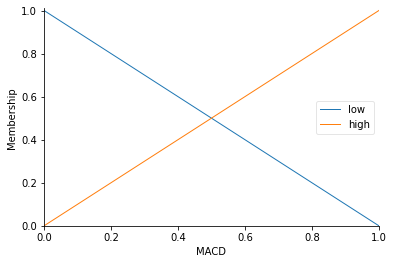

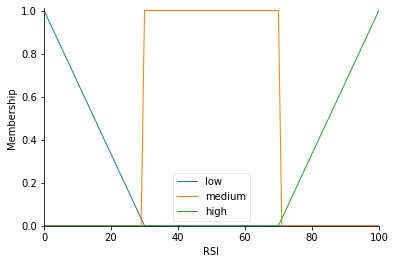

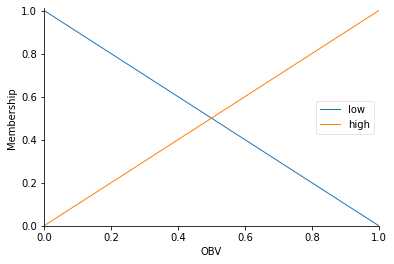

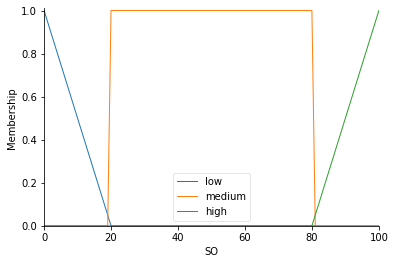

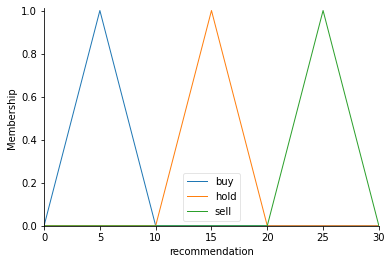

In [23]:
MACD.view()
RSI.view()
OBV.view()
SO.view()
recommendation.view()

In [24]:
rule1 = ctrl.Rule(MACD['low'] & RSI['low'] & SO['low'] & OBV['high'], recommendation['buy'])
rule2 = ctrl.Rule(MACD['low'] & RSI['high'] & SO['high'] & OBV['low'], recommendation['buy'])
rule3 = ctrl.Rule(MACD['high'] & RSI['medium'] & SO['medium'] & OBV['high'], recommendation['buy'])
rule4 = ctrl.Rule(MACD['high'] & RSI['medium'] & SO['high'] & OBV['low'], recommendation['sell'])
rule5 = ctrl.Rule(RSI['low'] & SO['low'] & OBV['high'], recommendation['buy'])
rule6 = ctrl.Rule(RSI['high'] & SO['high'] & OBV['low'], recommendation['sell'])
rule7 = ctrl.Rule(MACD['low'] & RSI['high'] & SO['high'], recommendation['sell'])
rule8 = ctrl.Rule(MACD['low'] & RSI['medium'] & SO['medium'], recommendation['hold'])
rule9 = ctrl.Rule(MACD['high'] & RSI['medium'] & SO['medium'] & OBV['low'], recommendation['hold'])

15.000000000000004


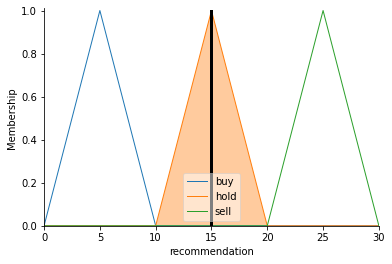

In [25]:
recommendation_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
recommend = ctrl.ControlSystemSimulation(recommendation_ctrl)
recommend.input['MACD'] = 0
recommend.input['RSI'] = 30
recommend.input['SO'] = 70
recommend.input['OBV'] = 0
recommend.compute()
print(recommend.output['recommendation'])
recommendation.view(sim = recommend)